In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Plan" data-toc-modified-id="Plan-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Plan</a></div><div class="lev2 toc-item"><a href="#Classes" data-toc-modified-id="Classes-02"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Classes</a></div><div class="lev2 toc-item"><a href="#Tests" data-toc-modified-id="Tests-03"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Tests</a></div>

## Plan
* Code in idle for prototyping
* Move to functions.py for functions
* Move finished tests to tests.py

## Classes
The following classes/methods exist in the dataset
* downsample
* encode
* Network
* Loss

In [2]:
from functions import *
from tests import *

## Tests
Writing tests for all of these methods. Checking all of them should be sufficient for this code.

E

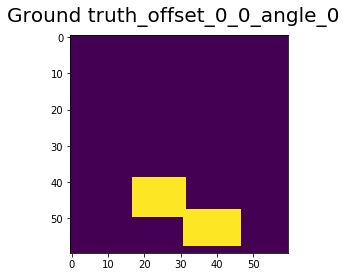

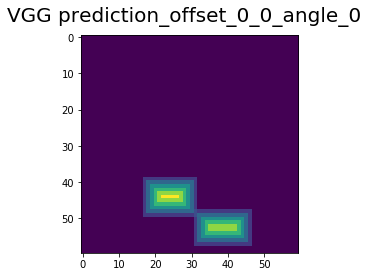

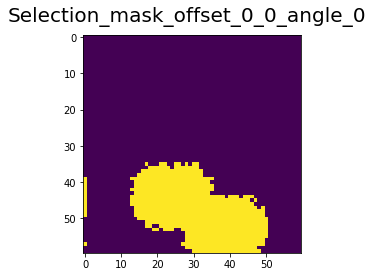

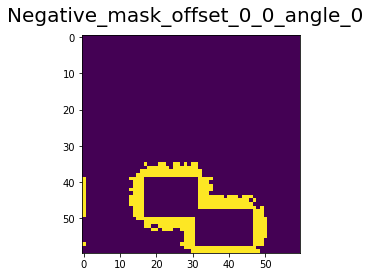

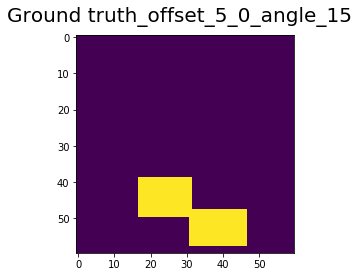

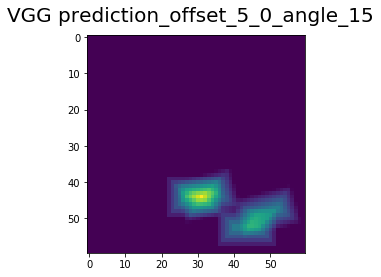

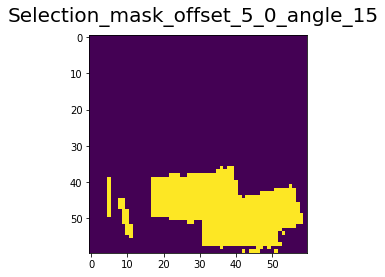

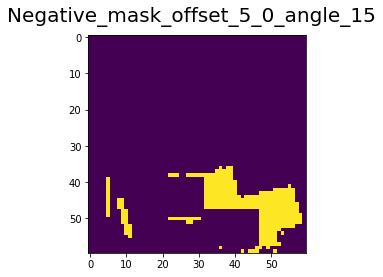

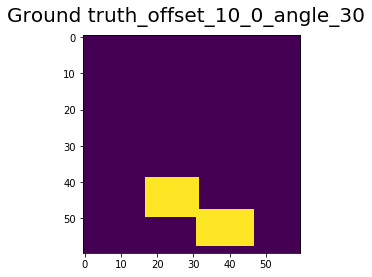

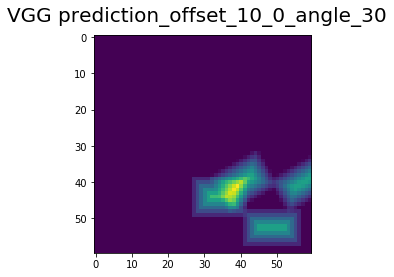

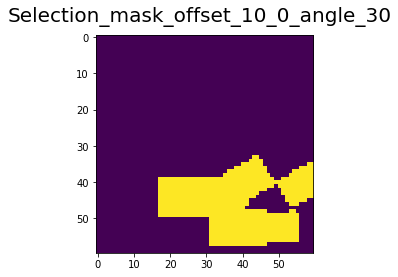

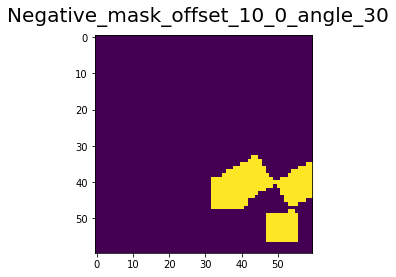

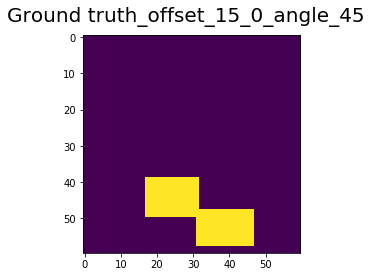

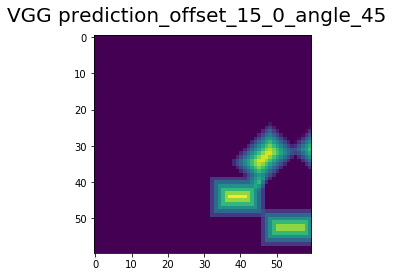

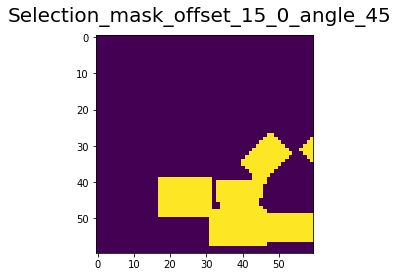

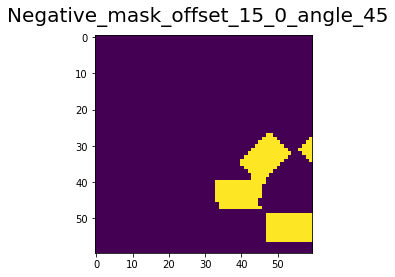

.

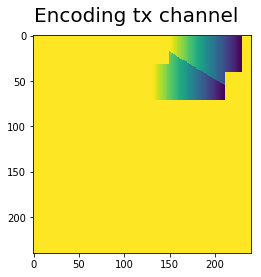

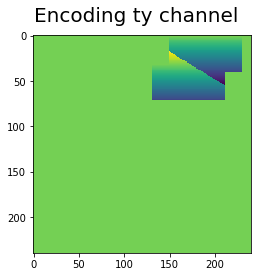

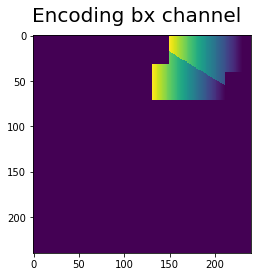

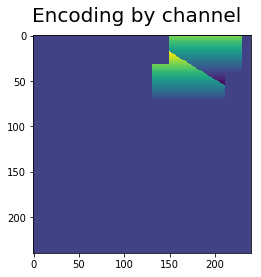

.

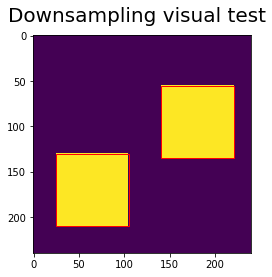

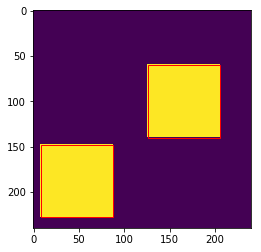

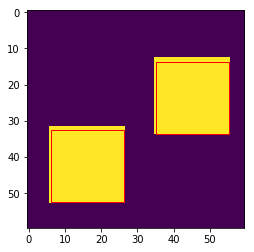

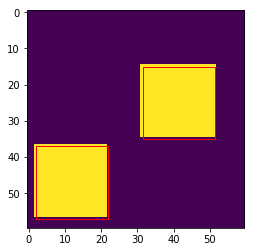

.
ERROR: test_class_loss (tests.TestCode)
LOGIC: Calculate classification loss for the network with batch size of two. Trivial category.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "tests.py", line 151, in test_class_loss
    class_loss = classification_loss(pred_class, gt_class, debug=True)
  File "functions.py", line 109, in classification_loss
    selected_loss = abs_loss * cuda.to_gpu(mask)
  File "/usr/local/lib/python2.7/dist-packages/chainer/functions/math/basic_math.py", line 301, in mul
    return MulConstant(rhs).apply((self,))[0]
  File "/usr/local/lib/python2.7/dist-packages/chainer/function_node.py", line 243, in apply
    outputs = self.forward(in_data)
  File "/usr/local/lib/python2.7/dist-packages/chainer/functions/math/basic_math.py", line 284, in forward
    value = _preprocess_const(x[0], self.value)
  File "/usr/local/lib/python2.7/dist-packages/chainer/functions/math/basic_math.py", line 43, in _p

<unittest.runner.TextTestResult run=4 errors=1 failures=0>

In [3]:
ts = TestSuite()
#ts.ad
ts.addTests([TestCode('test_class_loss')]) 
ts.addTests([TestCode('test_select_mask')])
ts.addTests([TestCode('test_encode_y')])
ts.addTests([TestCode('test_downsample')])

#ts.addTests([TestCode('test_network')])
#ts.addTests([TestCode('test_reg_loss')])

unittest.TextTestRunner().run(ts)

In [4]:
!git status

On branch pawan_files
Your branch is up-to-date with 'origin/pawan_files'.
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   functions.py
	modified:   functions.pyc
	modified:   network.py
	modified:   network.pyc

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.ipynb_checkpoints/
	Training-pawan_version-Copy1.ipynb
	Training-pawan_version.ipynb
	Training.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [5]:
import chainer.functions as F
ob1 = np.random.random((2,1,4,4)).astype(np.float32)
ob2 = np.random.random((2,1,4,4)).astype(np.float32)
F.huber_loss(ob1,ob2, 0.5)

variable([[[  1.39553016e-02,   2.46956535e-02,   3.36907446e-01,
              2.54859447e-01],
           [  5.14277220e-02,   6.68428540e-02,   5.85236587e-04,
              2.24371664e-02],
           [  1.46535048e-02,   9.17407684e-03,   8.84508248e-03,
              1.44399971e-01],
           [  7.89932013e-02,   6.39591180e-03,   9.55985337e-02,
              2.78601497e-01]],

          [[  5.23726083e-02,   5.26120961e-02,   4.73761074e-02,
              9.92623530e-03],
           [  2.42638230e-01,   6.10092143e-03,   2.83626020e-01,
              1.93310361e-02],
           [  2.21490283e-02,   1.04236575e-02,   2.15247422e-01,
              8.01642835e-02],
           [  2.79185712e-01,   1.40372751e-04,   6.42493293e-02,
              3.45219150e-02]]])

In [6]:
!git diff

diff --git a/functions.py b/functions.py
index 825fb26..c511652 100644
--- a/functions.py
+++ b/functions.py
@@ -47,10 +47,10 @@ def match_boxes(x, y, boxes):
         cx = (box[0] + box[2])/2
         cy = (box[1] + box[3])/2
         
-        box_dist = (cx - x)**2 + (cy - y)**2
-        scaled_dist = box_dist/12.25
+        box_dist = np.sqrt((cx - x)**2 + (cy - y)**2)
+        
         if box_dist < dist:
-            offset = np.array([box[0] - x, box[1] - y, box[2] - x, box[3] - y])
+            offset = np.array([box[0] - x, box[1] - y, box[2] - x, box[3] - y])/12.25 # offset is still distance
             dist = box_dist
             
     # Should not glitch because matching is only done for positive indices
@@ -89,7 +89,7 @@ def loss(pred_class, pred_loc, gt_class, gt_loc, lambd=1):
     Returns:
         loss: Scalar value of 
     """
-    return classification_loss(pred_class, gt_class) #+ lambd * regression_loss(pred_loc, gt_loc, gt_class)
+    return classification_los